# State Distribution Example

In this example, we plan to plot the distribution of system states. This helps researchers on serverless computing platforms to debug and test out their performance models with knowledge of system state distribution.

In [20]:
# imports

%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [21]:
from pacssim.ServerlessSimulator import ServerlessSimulator as Sim

sim = Sim(arrival_rate=0.9, warm_service_rate=1/2.016, cold_service_rate=1/2.163,
            expiration_threshold=600, max_time=100000)
sim.generate_trace(debug_print=False)
sim.print_trace_results()

Cold Starts / total requests: 	 127 / 90246
Cold Start Probability: 	 0.0014
Average Instance Life Span: 	 6365.1796
Average Server Count:  		 7.8255
Average Running Count:  	 1.8149
Average Idle Count:  		 6.0106


You can define any state representation you want based on the data present in the trace.
Here, we chose to use the number of servers as state.

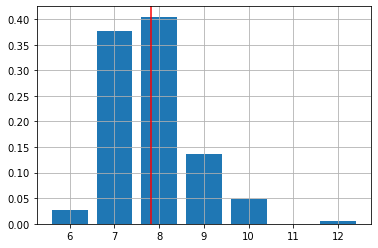

In [29]:
sim.calculate_time_lengths()

# skip first 100 events
unq_vals = np.unique(sim.hist_server_count[100:])
val_times = []
for val in unq_vals:
    t = sim.time_lengths[sim.hist_server_count == val].sum()
    val_times.append(t)

# convert to percent
val_times = np.array(val_times)
val_times = val_times / val_times.sum()

plt.bar(unq_vals, val_times)
plt.grid(True)
plt.axvline(x=sim.get_average_server_count(), c='r')

In [26]:
pd.DataFrame(data = {
    'server_count': unq_vals,
    'Probability': val_times
})

,server_count,Probability
0,6,0.026866
1,7,0.377407
2,8,0.404858
3,9,0.136758
4,10,0.048088
5,11,0.000019
6,12,0.006003
